In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sklearn import ensemble, cross_validation, learning_curve, metrics

import numpy as np
import pandas as pd

### https://www.kaggle.com/c/bioresponse/data

In [4]:
bioresponse = pd.read_csv('data/bioresponse.csv', header=0, sep=',')

In [5]:
bioresponse.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [6]:
bioresponse.shape

(3751, 1777)

In [8]:
bioresponse.columns

Index(['Activity', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9',
       ...
       'D1767', 'D1768', 'D1769', 'D1770', 'D1771', 'D1772', 'D1773', 'D1774',
       'D1775', 'D1776'],
      dtype='object', length=1777)

In [9]:
bioresponse_target = bioresponse.Activity.values

In [13]:
print('bioresponse:\n0 = {:.2}\n1 = {:.2}'.format(sum(bioresponse_target)/float(len(bioresponse_target)), 
                                           1-sum(bioresponse_target)/float(len(bioresponse_target))))

bioresponse:
0 = 0.54
1 = 0.46


In [14]:
bioresponse_data = bioresponse.iloc[:, 1:]

# model: random forest 

In [16]:
rf_classifier_low_depth = ensemble.RandomForestClassifier(n_estimators=50, max_depth=2, random_state=1)

In [19]:
train_sizes, train_scores, test_scores = learning_curve.learning_curve(rf_classifier_low_depth,
                                                                   bioresponse_data, bioresponse_target,
                                                                   train_sizes=np.arange(0.1, 1.0, 0.2),
                                                                   cv=3, scoring='accuracy')

In [20]:
print(train_sizes)
print(train_scores.mean(axis=1))
print(test_scores.mean(axis=1))

[ 250  750 1250 1750 2250]
[ 0.74933333  0.71333333  0.68453333  0.69104762  0.69022222]
[ 0.62356685  0.64195598  0.65369955  0.66248974  0.66728527]


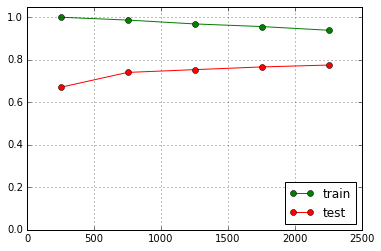

In [28]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis=1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis=1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [41]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=50, max_depth=10, random_state=1)

In [42]:
train_sizes, train_scores, test_scores = learning_curve.learning_curve(rf_classifier,
                                                                   bioresponse_data, bioresponse_target,
                                                                   train_sizes=np.arange(0.1, 1.0, 0.2),
                                                                   cv=3, scoring='accuracy')

In [43]:
print(train_sizes)
print(train_scores.mean(axis=1))
print(test_scores.mean(axis=1))

[ 250  750 1250 1750 2250]
[ 1.          0.98666667  0.96853333  0.95619048  0.93866667]
[ 0.67048484  0.74033744  0.75340069  0.76619515  0.77499195]


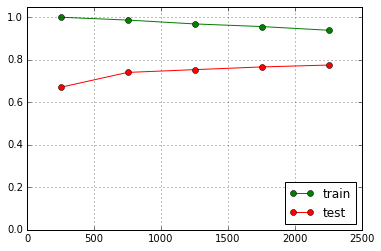

In [44]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis=1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis=1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')